In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV 
from joblib import parallel_backend
from sklearn.tree import export_graphviz
import graphviz
from pydotplus import graph_from_dot_data

ModuleNotFoundError: No module named 'pydotplus'

In [2]:
dataframe = pd.read_csv("../Preprocessing/preprocessdffixed.csv")
dataframe = dataframe = dataframe.drop(['Unnamed: 0' ], axis=1)
dataframe

,User Rating,Review,Price,Year,Genre,Occurences,Total Stars,000,10,100,...,write,year,york,young,zelda,zhi,zinczenko,zone,zoo,zusak
0,0.8750,0.197178,0.067308,0.7,1.0,0.000000,0.193075,0.0,0.914439,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.8125,0.022949,0.201923,0.2,0.0,0.000000,0.021992,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.8750,0.215730,0.134615,0.9,1.0,0.000000,0.211241,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.8750,0.243577,0.048077,0.8,0.0,0.000000,0.238507,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.9375,0.086875,0.105769,1.0,1.0,0.000000,0.086891,1.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,0.7500,0.122124,0.134615,0.3,0.0,0.000000,0.114481,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
343,0.5625,0.014407,0.096154,0.1,1.0,0.000000,0.012571,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
344,0.9375,0.245866,0.076923,0.4,0.0,0.444444,0.245879,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
345,1.0000,0.106783,0.067308,1.0,0.0,0.000000,0.109032,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Separates total stars into highly rated (1) and not highly rated (0)
dataframe.loc[dataframe['Total Stars']>0.17, 'Total Stars'] = 1
dataframe.loc[dataframe['Total Stars']<=0.17, 'Total Stars'] = 0
X_total_stars = dataframe.drop('Total Stars', axis=1).values
y_total_stars = dataframe['Total Stars']
column_names_stars = dataframe.drop('Total Stars', axis=1).columns

In [4]:
# Separates rating values into highly rated (1) and not highly rated (0)
dataframe = pd.read_csv("../Preprocessing/preprocessdffixed.csv")
dataframe = dataframe = dataframe.drop(['Unnamed: 0' ], axis=1)
dataframe.loc[dataframe['User Rating']>0.8, 'User Rating'] = 1
dataframe.loc[dataframe['User Rating']<=0.8, 'User Rating'] = 0
X_reviews = dataframe.drop('User Rating', axis=1).values
y_reviews = dataframe['User Rating']

dataframe

,User Rating,Review,Price,Year,Genre,Occurences,Total Stars,000,10,100,...,write,year,york,young,zelda,zhi,zinczenko,zone,zoo,zusak
0,1.0,0.197178,0.067308,0.7,1.0,0.000000,0.193075,0.0,0.914439,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.022949,0.201923,0.2,0.0,0.000000,0.021992,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.215730,0.134615,0.9,1.0,0.000000,0.211241,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.243577,0.048077,0.8,0.0,0.000000,0.238507,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.086875,0.105769,1.0,1.0,0.000000,0.086891,1.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,0.0,0.122124,0.134615,0.3,0.0,0.000000,0.114481,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
343,0.0,0.014407,0.096154,0.1,1.0,0.000000,0.012571,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
344,1.0,0.245866,0.076923,0.4,0.0,0.444444,0.245879,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
345,1.0,0.106783,0.067308,1.0,0.0,0.000000,0.109032,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
X_train_stars, X_test_stars, y_train_stars, y_test_stars = train_test_split(X_total_stars, y_total_stars)
X_train_reviews, X_test_reviews, y_train_reviews, y_test_reviews = train_test_split(X_reviews, y_reviews)

In [6]:
dt = DecisionTreeClassifier()
param_grid = {
    'max_depth': range(1, 200, 1),
    'criterion': ['gini', 'entropy'],
    'max_features': range(1, 100, 1)
}
dtc = GridSearchCV(dt, param_grid, cv = 5, n_jobs = -1)

In [13]:
dtc.fit(X_train_stars, y_train_stars)
y_train_pred_stars = dtc.predict(X_train_stars)
y_test_pred_stars = dtc.predict(X_test_stars)
print('Stars Scores')
print('\n-Train')
print('--Accuracy')
print(dtc.score(X_train_stars, y_train_stars))
print('--Precision')
print(precision_score(y_train_stars, y_train_pred_stars))
print('--Recall')
print(recall_score(y_train_stars, y_train_pred_stars))
print('--F1 Score')
print(f1_score(y_train_stars, y_train_pred_stars))
print('\n-Test')
print('--Accuracy')
print(dtc.score(X_test_stars, y_test_stars))
print('--Precision')
print(precision_score(y_test_stars, y_test_pred_stars))
print('--Recall')
print(recall_score(y_test_stars, y_test_pred_stars))
print('--F1 Score')
print(f1_score(y_test_stars, y_test_pred_stars))
print(dtc.best_params_)

Stars Scores

-Train
--Accuracy
1.0
--Precision
1.0
--Recall
1.0
--F1 Score
1.0

-Test
--Accuracy
0.9540229885057471
--Precision
0.9285714285714286
--Recall
0.8125
--F1 Score
0.8666666666666666
{'criterion': 'entropy', 'max_depth': 96, 'max_features': 88}


In [28]:
dot_data = open("/Users/ryanhoffmann/Dropbox/EECE 2300 Fall'20/Decision Trees/dt1.dot", 'w')
dot_data = export_graphviz(dtc.best_estimator_, out_file=dot_data, 
                           filled=True, rounded=True, feature_names=column_names_stars, class_names=['0', '1'])

In [27]:
dtc.fit(X_train_reviews, y_train_reviews)
y_train_pred_reviews = dtc.predict(X_train_reviews)
y_test_pred_reviews = dtc.predict(X_test_reviews)
print('Ratings Scores')
print('\n-Train')
print('--Accuracy')
print(dtc.score(X_train_reviews, y_train_reviews))
print('--Precision')
print(precision_score(y_train_reviews, y_train_pred_reviews))
print('--Recall')
print(recall_score(y_train_reviews, y_train_pred_reviews))
print('--F1 Score')
print(f1_score(y_train_reviews, y_train_pred_reviews))
print('\n-Test')
print('--Accuracy')
print(dtc.score(X_test_reviews, y_test_reviews))
print('--Precision')
print(precision_score(y_test_reviews, y_test_pred_reviews))
print('--Recall')
print(recall_score(y_test_reviews, y_test_pred_reviews))
print('--F1 Score')
print(f1_score(y_test_reviews, y_test_pred_reviews))
print(dtc.best_params_)

Ratings Scores

-Train
--Accuracy
1.0
--Precision
1.0
--Recall
1.0
--F1 Score
1.0

-Test
--Accuracy
0.6436781609195402
--Precision
0.7285714285714285
--Recall
0.8095238095238095
--F1 Score
0.7669172932330828
{'criterion': 'gini', 'max_depth': 152, 'max_features': 18}


Text(0.5, 1.0, 'Stars Test Scores')

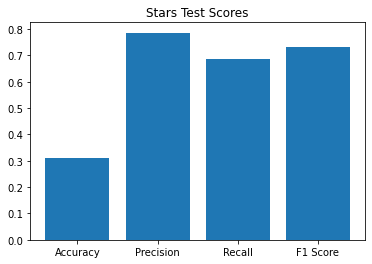

In [10]:
x_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
data = [dtc.score(X_test_stars, y_test_stars), precision_score(y_test_stars, y_test_pred_stars), recall_score(y_test_stars, y_test_pred_stars), f1_score(y_test_stars, y_test_pred_stars)]
x = np.arange(len(x_labels))
plt.bar(x, data)
plt.xticks(ticks=x, labels=x_labels)
plt.title(label='Stars Test Scores')

Text(0.5, 1.0, 'Ratings Test Scores')

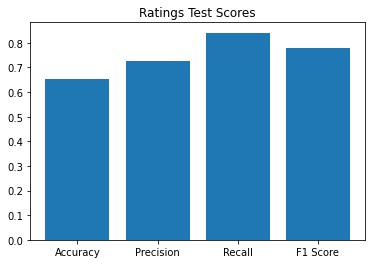

In [11]:
x_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
data = [dtc.score(X_test_reviews, y_test_reviews), precision_score(y_test_reviews, y_test_pred_reviews), recall_score(y_test_reviews, y_test_pred_reviews), f1_score(y_test_reviews, y_test_pred_reviews)]
x = np.arange(len(x_labels))
plt.bar(x, data)
plt.xticks(ticks=x, labels=x_labels)
plt.title(label='Ratings Test Scores')

In [12]:
column_names

NameError: name 'column_names' is not defined